# importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# importing and understanding the data

In [2]:
data = pd.read_csv('EmployeeBurnout1.csv')

In [3]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.9,0.52


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [5]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


# Data Preprocessing 

### Handling missing values

In [6]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [7]:
# Drop rows with missing target values
data.dropna(subset=['Burn Rate'], inplace=True)

In [8]:
# Specify the columns to fill with column means
columns_to_fill = ['Resource Allocation', 'Mental Fatigue Score']

# Fill missing values in the specified columns with column means
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())

### Encoding Categorical Variables

In [9]:
# Binary encoding
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
data['Company Type'] = data['Company Type'].replace({'Product': 0, 'Service': 1})
data['WFH Setup Available'] = data['WFH Setup Available'].replace({'No': 0, 'Yes': 1})


In [10]:
# Extract date features
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])
data['Join Month'] = data['Date of Joining'].apply(lambda x: x.month)
data['Join Day'] = data['Date of Joining'].apply(lambda x: x.day)
data = data.drop('Date of Joining', axis=1)

In [11]:
data.head()

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Join Month,Join Day
0,fffe32003000360033003200,0,1,0,2,3.000000,3.8,0.16,9,30
1,fffe3700360033003500,1,1,1,1,2.000000,5.0,0.36,11,30
2,fffe31003300320037003900,0,0,1,2,4.483831,5.8,0.49,3,10
3,fffe32003400380032003900,1,1,1,1,1.000000,2.6,0.20,11,3
4,fffe31003900340031003600,0,1,0,3,7.000000,6.9,0.52,7,24


# Expolarty Data Analysis 

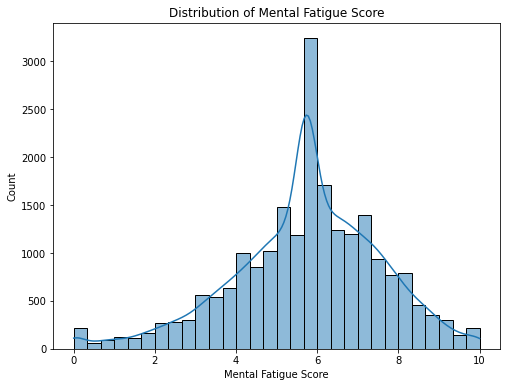

In [12]:
# Data Distribution - Histogram for 'Mental Fatigue Score'
plt.figure(figsize=(8, 6))
sns.histplot(data['Mental Fatigue Score'], bins=30, kde=True)
plt.title('Distribution of Mental Fatigue Score')
plt.show()

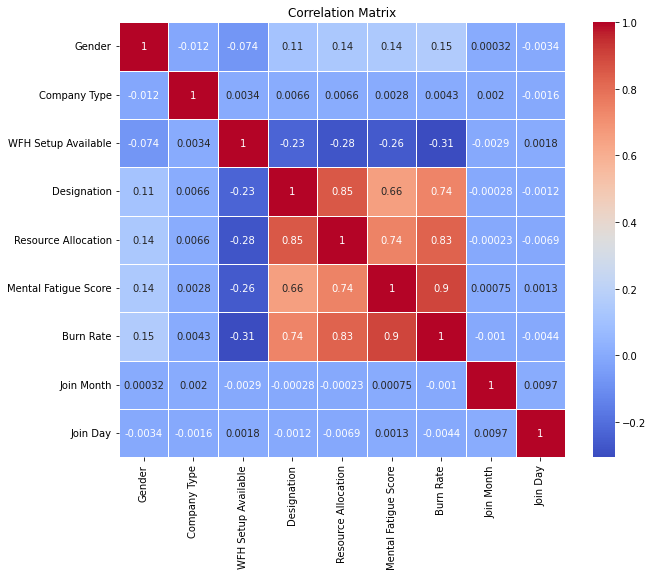

In [13]:
# Correlation Analysis - Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


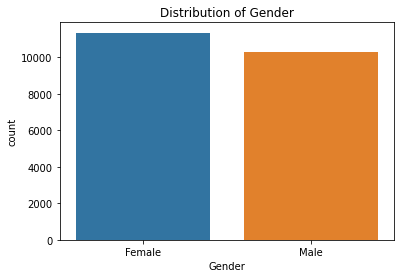

In [14]:
# Categorical Variable Analysis - Bar plot for 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
gender_labels = ['Female', 'Male']
plt.xticks(ticks=[0, 1], labels=gender_labels)
plt.title('Distribution of Gender')
plt.show()

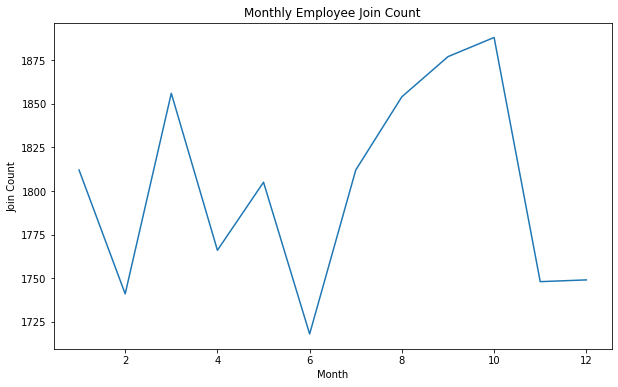

In [15]:
# Time-Based Analysis - Line plot for 'Join Month'
monthly_join_count = data['Join Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_join_count.index, y=monthly_join_count.values)
plt.title('Monthly Employee Join Count')
plt.xlabel('Month')
plt.ylabel('Join Count')
plt.show()

# importing linear regression from scratch

In [16]:
class MyLinearRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        self.samples, self.features = X.shape
        self.weights = [0] * self.features
        self.bias = 0

        for _ in range(self.iterations):
            gradients_w, gradient_b = self.compute_gradients(X, Y)
            self.weights = [w - self.learning_rate * dw for w, dw in zip(self.weights, gradients_w)]
            self.bias -= self.learning_rate * gradient_b

        return self

    def compute_gradients(self, X, Y):
        predictions = self.predict(X)
        error = [pred - y for pred, y in zip(predictions, Y)]

        gradients_w = [(2 / self.samples) * sum(x * e for x, e in zip(X[:, i], error)) for i in range(self.features)]
        gradient_b = (2 / self.samples) * sum(error)

        return gradients_w, gradient_b

    def predict(self, X):
        return [sum(x * w for x, w in zip(sample, self.weights)) + self.bias for sample in X]

In [17]:
# Split df into X and y
y = data['Burn Rate']
X =  data[['Resource Allocation', 'Mental Fatigue Score']]

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Initialize and fit  
learning_rate = 0.01
iterations = 1000

model = MyLinearRegression(learning_rate, iterations)
model.fit(X_train, y_train)

In [21]:
# Make predictions on the test set
predictions = model.predict(X_test)


In [22]:
# Evaluate the model using mean squared error
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.005121004109495038


In [23]:
from sklearn.metrics import r2_score

# Print R2 score
print("R2 Score (Coefficient of Determination): {:.5f}".format(r2_score(y_test, predictions)))

R2 Score (Coefficient of Determination): 0.86555
